# El algoritmo del árbol de decisión
![](https://camo.githubusercontent.com/43f6afaec19f955c8feca84cb67cd00a963061a5ecb583a5a39c16295c152a87/68747470733a2f2f7265732e636c6f7564696e6172792e636f6d2f6479643931316b6d682f696d6167652f75706c6f61642f76313637373530343935372f6465636973696f6e5f747265655f666f725f68656172745f61747461636b5f70726576656e74696f6e5f323134306264373632642e706e67)

Un árbol de decisión es una estructura arbórea similar a un diagrama de flujo en la que un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo de hoja representa el resultado.

El nodo superior de un árbol de decisión se denomina nodo raíz. Aprende a dividir en función del valor del atributo. Particiona el árbol de forma recursiva, lo que se denomina partición recursiva. Esta estructura similar a un diagrama de flujo le ayuda en la toma de decisiones. Se visualiza como un diagrama de flujo que imita fácilmente el pensamiento humano. Por eso los árboles de decisión son fáciles de entender e interpretar.

## Vamos a ver como funciona esto con datos..

### El conjunto de datos...
https://data.world/makeovermonday/2021w14

#### Resumen:
Se tomaron imágenes de 13.611 granos de 7 judías secas registradas diferentes con una cámara de alta resolución. Se obtuvieron de los granos un total de 16 características, 12 dimensiones y 4 formas.
#### Información relevante:
En esta investigación se utilizaron siete tipos diferentes de judías secas, teniendo en cuenta las características como la forma, el tipo y la estructura por la situación del mercado. Se desarrolló un sistema de visión por ordenador para distinguir siete variedades registradas diferentes de judías secas con características similares, con el fin de obtener una clasificación uniforme de las semillas. Para el modelo de clasificación, se tomaron imágenes de 13.611 granos de 7 judías secas registradas diferentes con una cámara de alta resolución. Las imágenes de las judías obtenidas por el sistema de visión por ordenador se sometieron a etapas de segmentación y extracción de características, y se obtuvieron de los granos un total de 16 características; 12 dimensiones y 4 formas.
#### Información sobre atributos:
1.) Área (A): El área de una zona de frijol y el número de píxeles dentro de sus límites.
2.) Perímetro (P): La circunferencia de un frijol se define como la longitud de su borde.
3.) Longitud del eje mayor (L): La distancia entre los extremos de la línea más larga que puede trazarse de un haba.
4.) Longitud del eje menor (l): La línea más larga que se puede trazar desde el haba estando perpendicular al eje mayor.
5.) Relación de aspecto (K): Define la relación entre L y l.
6.) Excentricidad (Ec): Excentricidad de la elipse que tiene los mismos momentos que la región.
7.) Área convexa (C): Número de píxeles del polígono convexo más pequeño que puede contener el área de una semilla de judía.
8.) Diámetro equivalente (Ed): El diámetro de un círculo que tiene la misma área que el área de una semilla de judía.
9.) Extensión (Ex): Relación entre los píxeles del cuadro delimitador y el área de la semilla de judía.
10.)Solidez (S): También llamada convexidad. Es la relación entre los píxeles de la cáscara convexa y los que se encuentran en los granos.
11.)Redondez (R): Se calcula con la siguiente fórmula: (4piA)/(P^2)
12.)Compacidad (CO): Mide la redondez de un objeto: Ed/L
13.)Factor de forma1 (SF1)
14.)Factor de forma2 (SF2)
15.)Factor de forma3 (SF3)
16.)FactorDeForma4 (SF4)
17.)Clase (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz y Sira)

## Manos a la obra...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [3]:
bean=pd.read_excel("Dry_Bean_Dataset.xlsx")

In [4]:
bean

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
X=bean.drop(columns=["Bean ID","Class"])
y1=bean["Class"]

In [6]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.25, random_state=485)

## Vamos a tratarlo como un problema de clasificación..

In [9]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X1_train,y1_train)

#Predict the response for test dataset
y1_pred = clf1.predict(X1_test)

In [10]:
y1_pred

array(['SIRA', 'CALI', 'SIRA', ..., 'SIRA', 'DERMASON', 'SEKER'],
      dtype=object)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

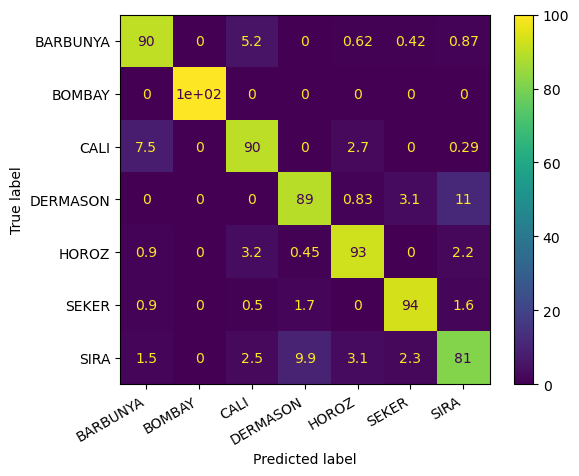

In [12]:
# https://data.world/makeovermonday/2021w14/workspace/project-summary?agentid=makeovermonday&datasetid=2021w14
cm1=confusion_matrix(y1_test, y1_pred, labels=clf1.classes_)/confusion_matrix(y1_test, y1_pred, labels=clf1.classes_).sum(axis=1)*100
ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf1.classes_).plot()
plt.xticks(rotation=30,ha="right")
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y1_test, y1_pred))

Accuracy: 0.8939171319424037


## Vamos a tratarlo como un problema de regresión..

In [14]:
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
# replacing values
y2=bean['Class'].replace(bean["Class"].unique(),np.arange(len(bean["Class"].unique())))

In [15]:
y2

0        0
1        0
2        0
3        0
4        0
        ..
13606    6
13607    6
13608    6
13609    6
13610    6
Name: Class, Length: 13611, dtype: int64

In [16]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.25, random_state=485)

In [17]:
# Create Decision Tree Regressor object
clf2 = DecisionTreeRegressor()

# Train Decision Tree Regressor
clf2 = clf2.fit(X2_train,y2_train)

#Predict the response for test dataset
y2_pred = clf2.predict(X2_test)

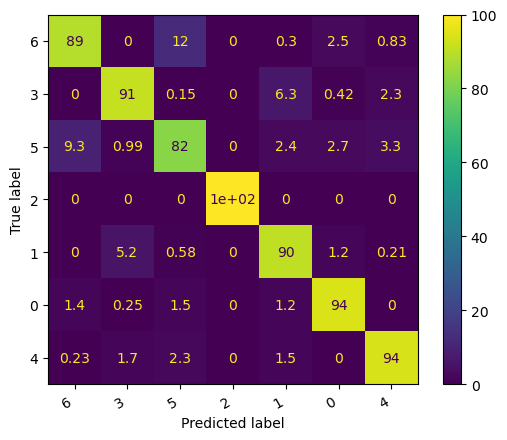

In [18]:
cm2=confusion_matrix(y2_test, y2_pred, labels=y2_test.unique())/confusion_matrix(y2_test, y2_pred, labels=y2_test.unique()).sum(axis=1)*100
ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=y2_test.unique()).plot()
plt.xticks(rotation=30,ha="right")
plt.show()

In [19]:
y2_test

12970    6
4304     3
9033     5
3979     3
11345    6
        ..
4819     3
6011     4
9678     5
12235    6
1788     0
Name: Class, Length: 3403, dtype: int64

## Graficando el arbol de decisión

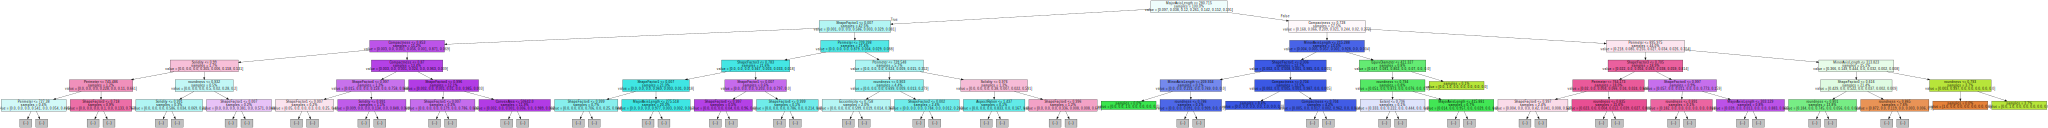

In [20]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import graphviz
for i in range(1):
    dot_data = export_graphviz(clf1,
                               feature_names=X2_train.columns,  
                               filled=True,  
                               max_depth=5, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)